# FloodProcessor class

The `FloodProcessor` class will orchestrate all the steps necessary to derive a flood mask. These steps include: 
* Estabilish the permanent water baseline (through the Recurrence layer acquired by the ImageFinder)
* Download the corresponding S1 Imagery (through ImageFinder)
* Create the water masks (through WaterFinder class)
* Compare the water masks with the water baseline

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import geopandas as gpd
import contextily as cx

from flood_finder.floodprocessor import FloodProcessor
from flood_finder.reporter import ProcessorReporter


## Define AOI

In [2]:
roi = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              -55.85381630956452,
              -29.75258818268783
            ],
            [
              -55.85381630956452,
              -29.829051778923365
            ],
            [
              -55.73479957129133,
              -29.829051778923365
            ],
            [
              -55.73479957129133,
              -29.75258818268783
            ],
            [
              -55.85381630956452,
              -29.75258818268783
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

# write the ROI to a GeoDataFrame
# PS: We need to make sure the Coordinate Reference System is set
gdf = gpd.GeoDataFrame.from_features(roi).set_crs('epsg:4326')

In [3]:
processor = FloodProcessor(
    aoi_df=gdf,
    output_dir='../tmp',
    subscription_key='60c2795c5764470ca21438274583378d',
    time_range='2018-12/2019-02',
    recurrence_threshold=10,
    print_log=True,
    log_level=logging.DEBUG
)

2024-02-01 18:54:12 | tmp.FloodProcessor:INFO -> Creating processor for place: tmp
2024-02-01 18:54:12 | tmp.FloodProcessor:INFO -> Saving file ../tmp/gdf.geojson
2024-02-01 18:54:12 | tmp.WaterFinder:INFO -> Starting WaterFinder instance for tmp
2024-02-01 18:54:13 | tmp.WaterFinder:INFO -> Retrieving water recurrence
2024-02-01 18:54:19 | tmp.WaterFinder:INFO -> Retrieving dates list for the AOI
2024-02-01 18:54:21 | tmp.FloodProcessor:INFO -> Get water_recurrence from WaterFinder
2024-02-01 18:54:21 | tmp.FloodProcessor:INFO -> Saving variables locally


In [4]:
processor

Flood Processor for place: tmp
Variables: dict_keys(['aoi_df', 'recurrence'])
WaterFinder for place tmp
Available dates: 9
Water detected dates: 9

In [59]:
processor.find_water(resume=True)
processor.process_floods(use_hand=False)

2024-02-01 19:27:43 | tmp.FloodProcessor:INFO -> Creating a water extents series


  0%|          | 0/9 [00:00<?, ?it/s]

2024-02-01 19:27:43 | tmp.FloodProcessor:INFO -> Calculating flood area for each date


  0%|          | 0/9 [00:00<?, ?it/s]

2024-02-01 19:27:43 | tmp.FloodProcessor:INFO -> table.csv exported with water/flood series


In [51]:
processor

Flood Processor for place: tmp
Variables: dict_keys(['aoi_df', 'recurrence', 'waters', 'water_series', 'data_table', 'floods', 'max_flood'])
WaterFinder for place tmp
Available dates: 9
Water detected dates: 9

<Axes: >

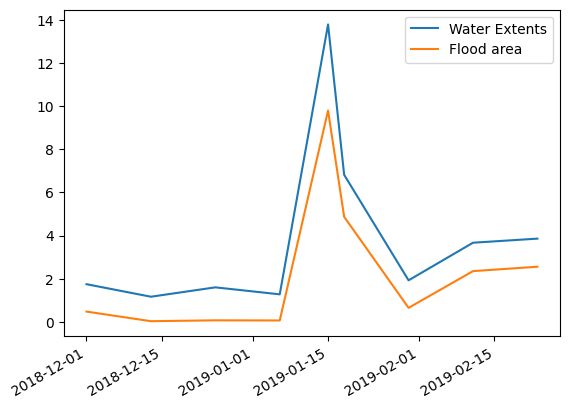

In [52]:
processor['data_table'].plot()

<Axes: title={'center': 'Flood for 2019-01-15'}, xlabel='x', ylabel='y'>

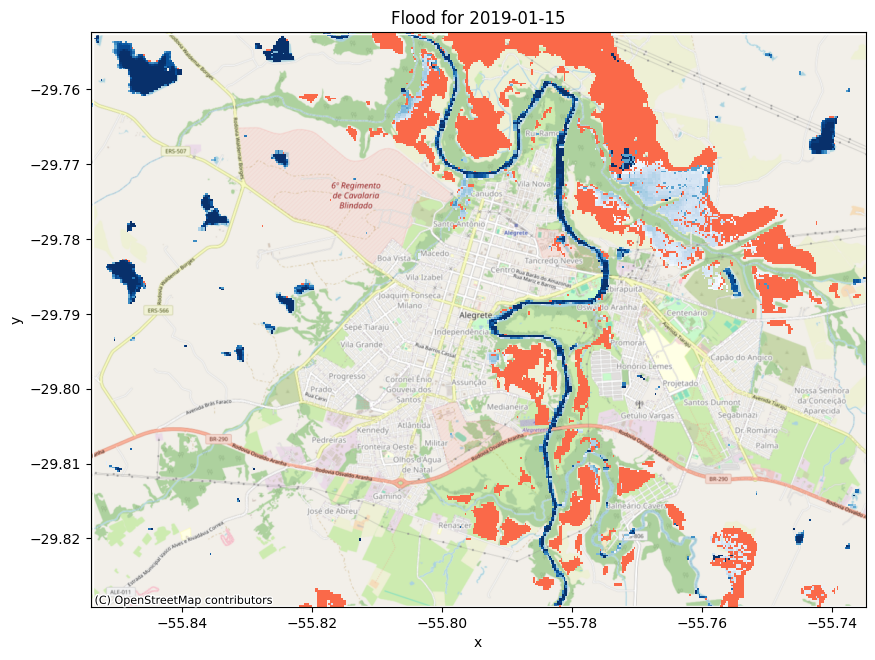

In [53]:
processor.plot_flood(date='2019-01-15', background=cx.providers.OpenStreetMap.Mapnik, recurrence_threshold=10)


In [54]:
reporter = ProcessorReporter(processor, 'Alegrete')

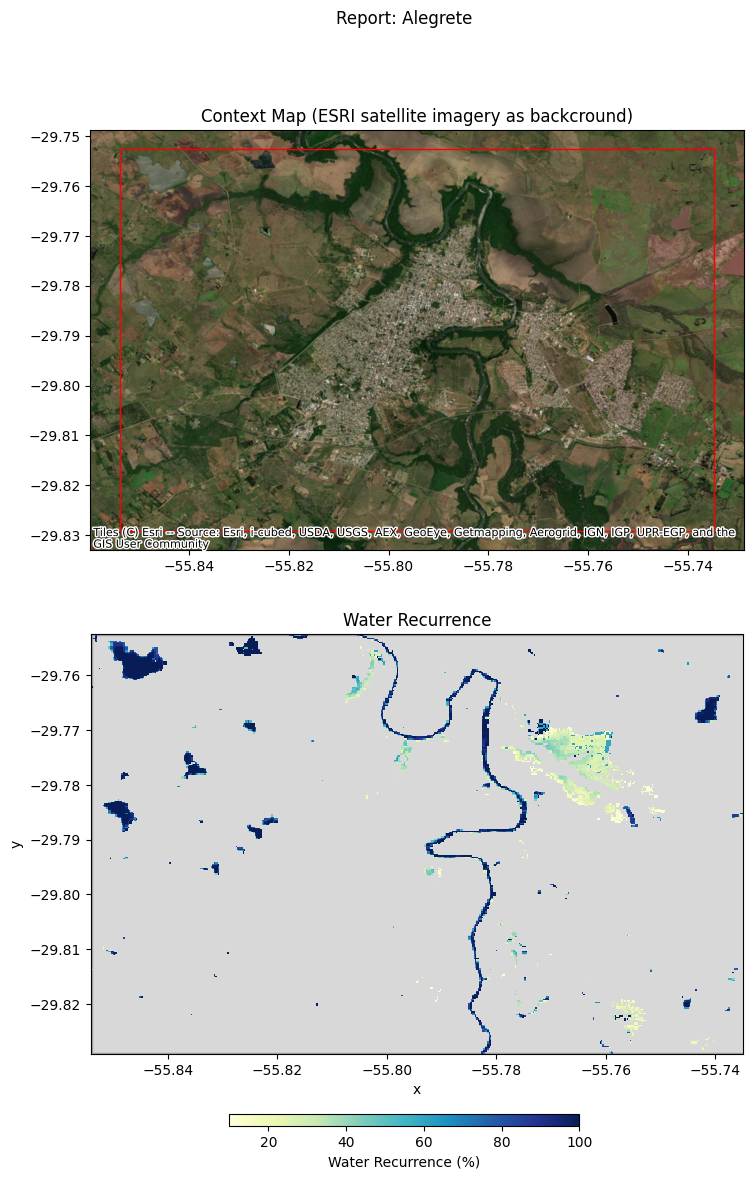

In [55]:
fig = reporter.create_context_page(figsize=(10, 6))
fig

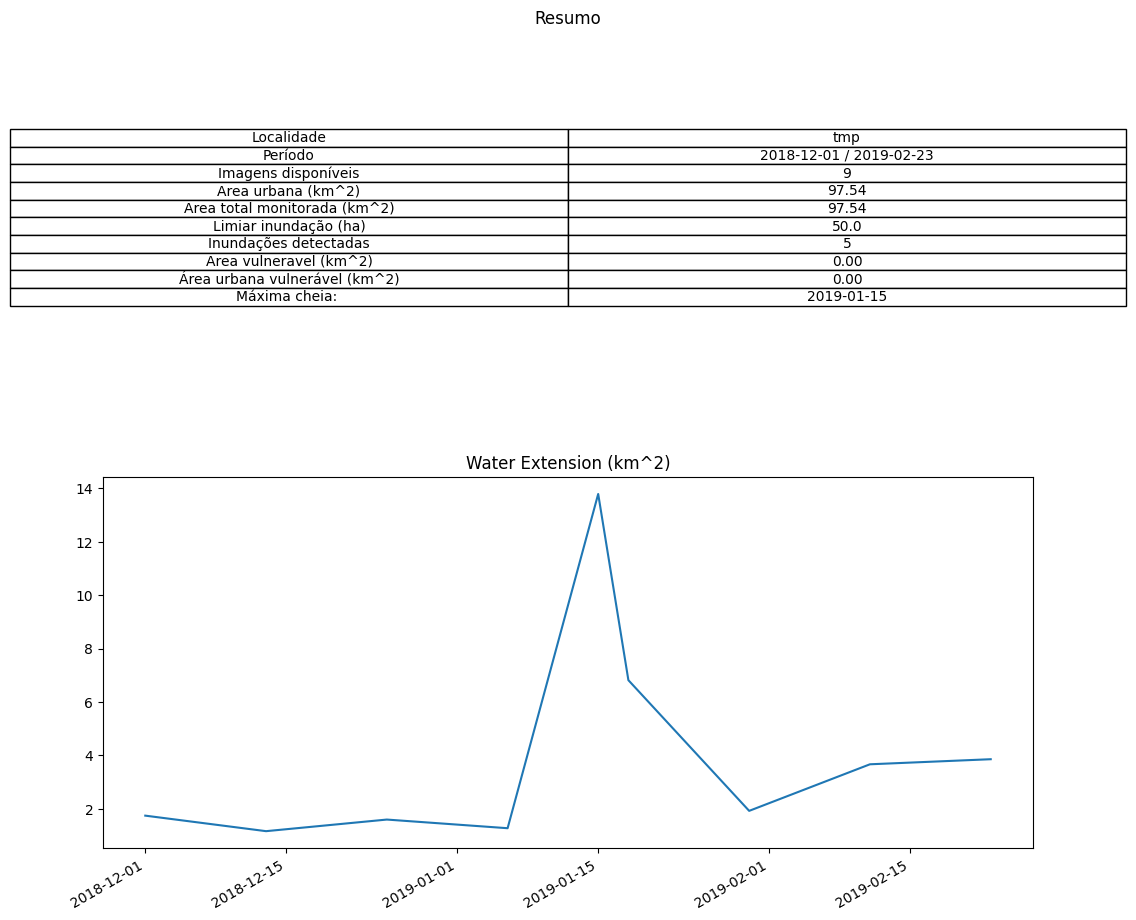

In [56]:
fig = reporter.create_summary_page()
fig

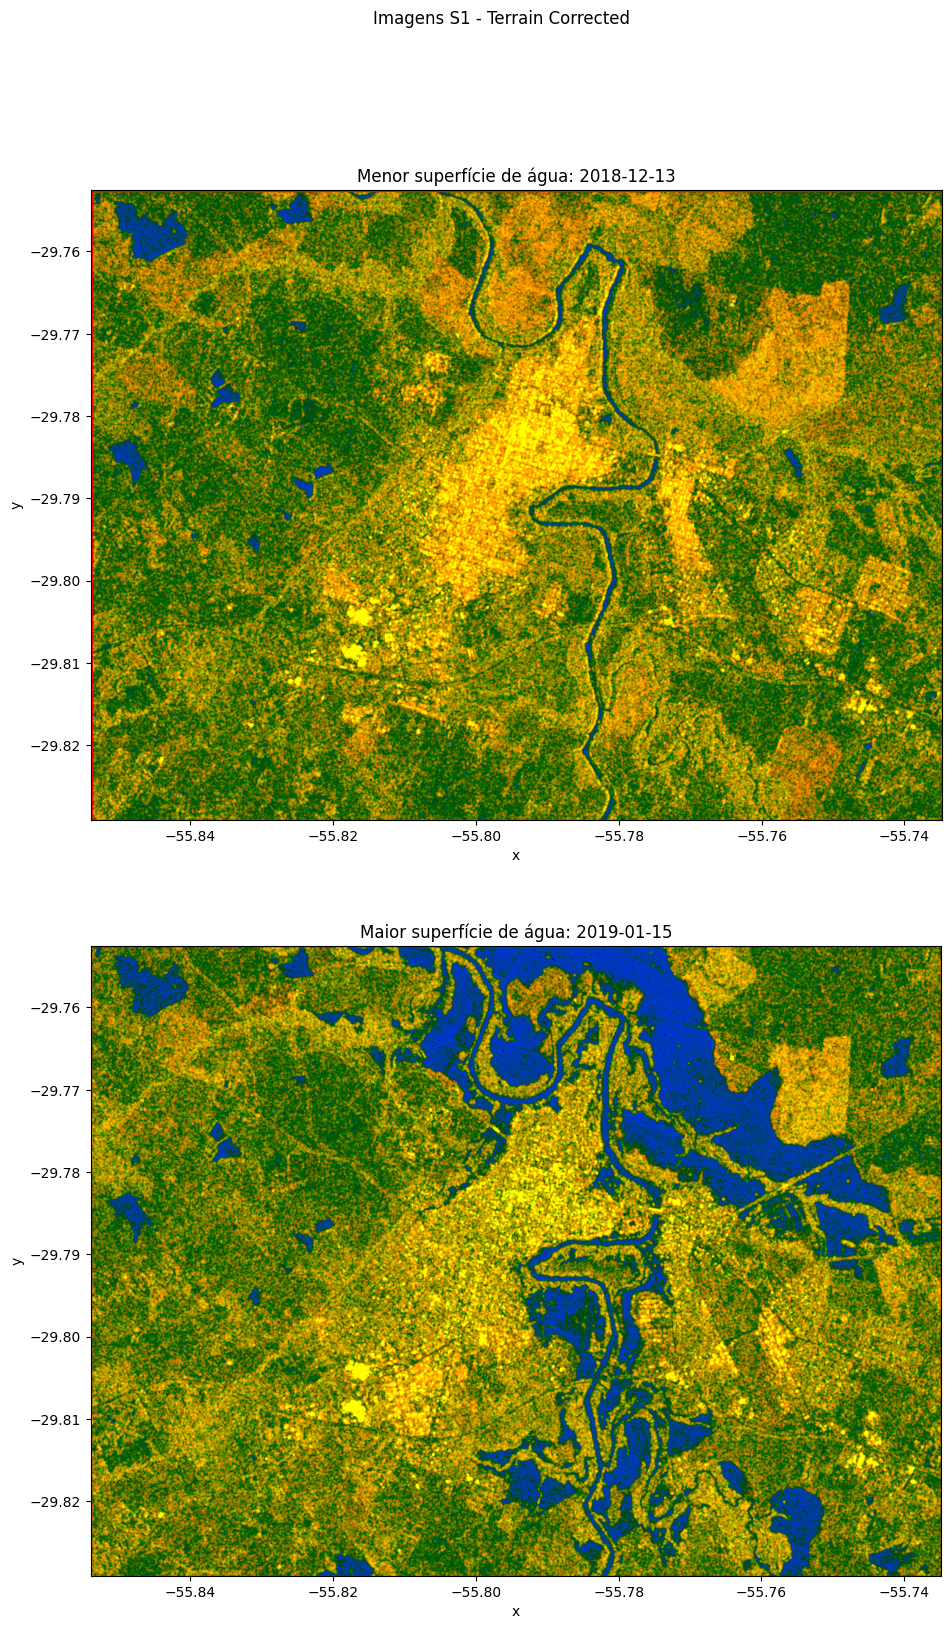

In [57]:
fig = reporter.create_s1_page()
fig

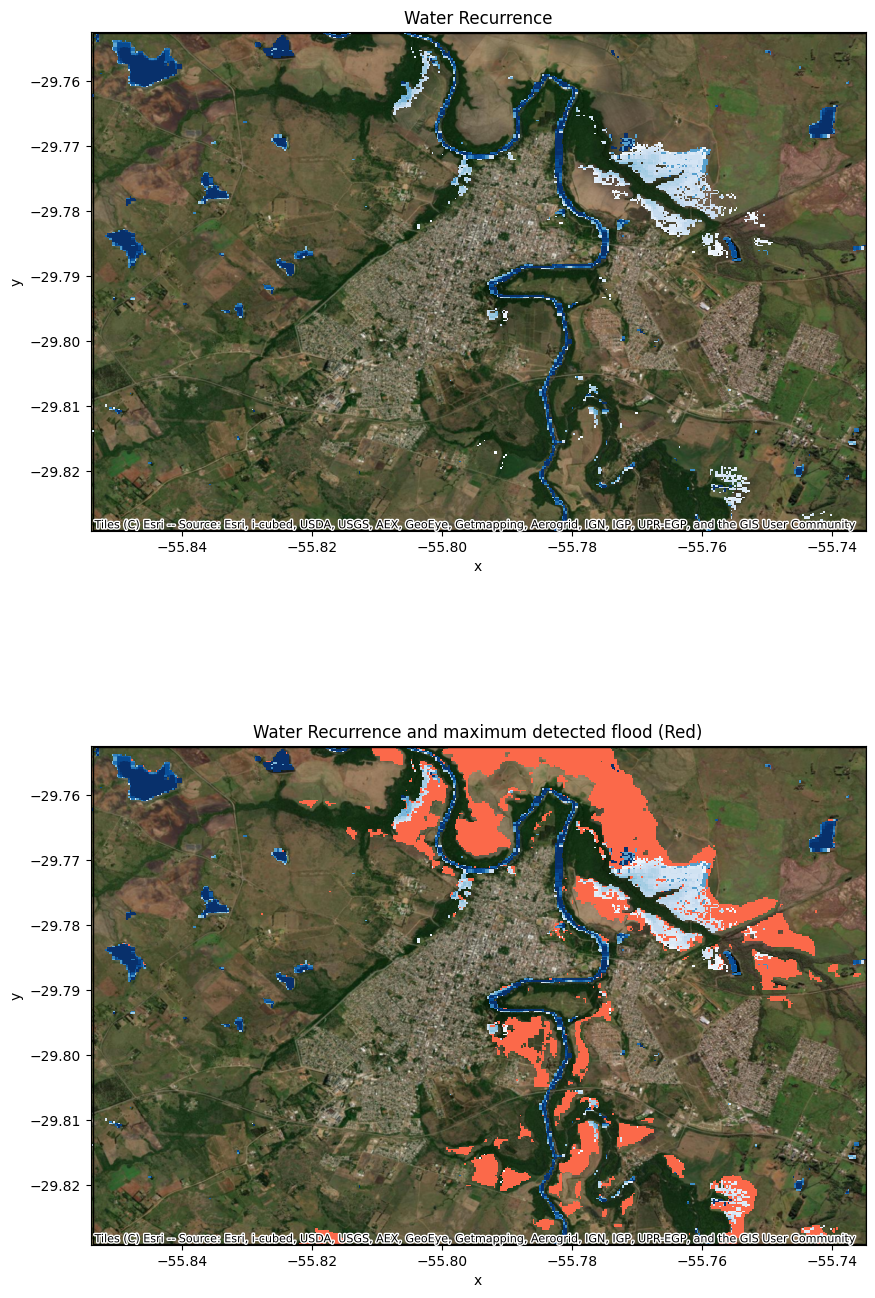

In [68]:
fig = reporter.create_flood_page()
fig

In [73]:
reporter.create_report()